In [248]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [249]:
def game (ra,rb):
    aProb = ra/(ra+rb)
    bProb = 1-aProb
    aScore = 0
    bScore = 0                                     
    while (aScore < 11 and bScore < 11) or abs(aScore - bScore) < 2:
        if random.random() < aProb:
            aScore += 1
        else:
            bScore += 1               
    return aScore, bScore

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [250]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [251]:
def win_probability_game(ra, rb, simulations):
    aGames = 0
    for i in range(simulations):
        aScore,bScore = game(ra,rb)
        if aScore > bScore:
            aGames += 1
            #print(aGames)
    #print (aGames/simulations)
    return aGames/simulations

**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [252]:
# Print win_probability_game(70, 30, print(round(winProbability(70, 30), 2))) to 2 decimal places for a suitable value of n
print (round(win_probability_game(70,30,1000),2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [253]:
def read_abilities(filename): 
    list = []
    with open (filename, "r") as csvfile:
        rdr = csv.reader(csvfile)
        next(rdr, None)
        for line in rdr:
            list.append((int(line[0].strip()),int(line[1].strip())))
        #print (list[1:])
        #list = list[1:]
        return (list)

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [254]:
# Print the result of calling the function for the file `test.csv`
print (read_abilities("test.csv"))

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]


**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [255]:
def plot_win_probabilities(filename,simulations): 
    list = []
    list = filename
    #print (list)
    for tuple in list:
        ra = tuple[0]
        rb = tuple[1]
        #print (ra,rb)
        plt.scatter([(float(ra)/float(rb))],[win_probability_game(float(ra),float(rb),simulations)], color="blue")
    plt.ylabel('Probability a wins')
    plt.xlabel("ra/rb")
    

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


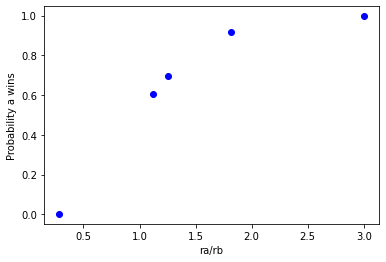

In [256]:
# Call the function to plot the figure here
plot_win_probabilities(read_abilities("test.csv"),600)

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [259]:
def win_probability_match(ra, rb, simulations, m):
    aMatches = 0
    bMatches = 0
    for i in range(simulations):
        result = matchWinChecker(ra,rb,m)
        if result == "a":
            aMatches +=1
        elif result == "b":
            bMatches +=1
    #print ("aMatches=",aMatches)
    #print ("bMatches=",bMatches)
    #print (aMatches/(aMatches+bMatches))
    return aMatches/(aMatches+bMatches)

def matchWinChecker(ra,rb,m):
    aGames = 0
    bGames = 0
    matchEnd = False
    while matchEnd == False:
        aScore, bScore = game(ra,rb)
        if aScore > bScore:
            aGames += 1
            if aGames == m:
                return "a"
        elif bScore > aScore:
            bGames += 1
            if bGames == m:
                return "b"
            
# Calculate lowest value of m here

In [260]:
#print (win_probability_match(60, 40, 300, 2))
m=1
end = False
while end == False:
    if win_probability_match(60, 40, 10000, m) < 0.9:
        m+=1
    else:
        print (m)
        end = True

2


Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

I am investigating whether the English Scoring System or the Point a Rally System (PARS) is a better scoring system for squash games.

A better scoring system will mean that the player with the higher modelled ability will win more frequently, as well as having a shorter match with less rallies in total. 

My hypothesis is that the PARS will return better games. This is because I expect the matches will be shorter as a point will be awarded after every rally as opposed to only when the server wins the rally.  I also believe that the more able player should win more as in English Scoring the better player may lose out on potential points as they have not served. This will be a problem the closer the two players are in terms of ability. In PARS the winner of the rally gets a point so the better player will not lose potential points in this way.

## Method

I will investigate how high the correlation is between the probability of A winning and A's ability level for both systems. This will be presented as a graph of ra/rb plotted against the probability of A winning a match of 5 games. To get this graph I have used my previous probability function where for a given amount of simulations it will loop through a match, and see which player has won. I have set the number of simulations to 1000.

I will investigate the mean length of each game for a given amount of simulations for PARS and English Scoring. To do this I have made record of the amount of points in a single game for the given ra and rb value and looped this function for a set amount of times, then I have divided the total points by the amount of times the function had looped to give the mean rallies per game. A shorter game length would be desirable

I have used a .csv file for the ra and rb values, where the rb value is always 15 and ra ranges from 1-250.

In [261]:
import random
import csv
import matplotlib.pyplot as plt
m=5

#PARS game
def game2(ra,rb):
    aProb = ra/(ra+rb)
    bProb = 1-aProb
    aScore = 0
    bScore = 0                                
    while (aScore < 11 and bScore < 11) or abs(aScore - bScore) < 2:
        if random.random() < aProb:
            #print ("A won point whilst A was serving")
            aScore += 1   
        else:
            #print ("B won point whilst A was serving")
            bScore += 1              
    #print (aScore,bScore)
    return aScore, bScore

#PARS plotting function
def plot_win_probabilities2(simulations):
    xplot = []
    yplotPARS = []
    yplotEnglish = []
    list = readAbilities("values.csv")
    #print (list)
    for i in list:
        #ra = random.randint(1,100)
        #rb = random.randint(1,100)
        ra = i[0]
        rb = i[1]
        xplot.append(ra/rb)
        yplotPARS.append(win_probability_match2(ra, rb, simulations, m))
        yplotEnglish.append(win_probability_matchEnglish(ra, rb, simulations, m))
    plt.plot(xplot,yplotPARS,"r", label = "PARS")
    plt.plot(xplot,yplotEnglish,"b", label = "English Scoring System")
    plt.xlim([0.5, 1.75])
    plt.legend()
    plt.title("A graph showing the probability that A wins a match vs the relative abilities of A and B, for the PARS and English Scoring")
    plt.ylabel('Probability A wins match')
    plt.xlabel("Relative abilities of A and B (ra/rb)")
    plt.show()

#PARS probability function
def win_probability_match2(ra, rb, simulations, m):
    aMatches = 0
    bMatches = 0
    for i in range(simulations):
        result = matchWinChecker2(ra,rb,m)
        if result == "a":
            aMatches +=1
        elif result == "b":
            bMatches +=1
    #print ("aMatches=",aMatches)
    #print ("bMatches=",bMatches)
    #print (aMatches/(aMatches+bMatches))
    return aMatches/(aMatches+bMatches)

#PARS checker function
def matchWinChecker2(ra,rb,m):
    aGames = 0
    bGames = 0
    matchEnd = False
    while matchEnd == False:
        aScore, bScore = game2(ra,rb)
        if aScore > bScore:
            #print ("A wins","A:",aGames,"B",bGames)
            aGames += 1
            if aGames == m:
                return "a"
        elif bScore > aScore:
            #print ("B wins","A:",aGames,"B",bGames)
            bGames += 1
            if bGames == m:
                return "b"

#English main game
def englishGame (ra,rb):    
    aProb = ra/(ra+rb)
    bProb = 1-aProb
    aScore = 0
    bScore = 0
    server = "A"
    finalpoint = 9
    endGame = False
    rallies = 0
    if random.random() < 0.5:
        server = "A"
    else:
        server = "B"
    while endGame == False:
        if server == "A":
            if random.random() < aProb:
                #print ("A won point whilst A was serving")
                server = "A"
                aScore += 1           
            else:
                #print ("B won point whilst A was serving")             
                server = "B"
                rallies += 1
                    
        elif server == "B":
            if random.random() <bProb:
                #print ("B won point whilst B was serving")             
                server = "B"
                bScore += 1
            else:
                #print ("A won point whilst B was serving")            
                server = "A"
                rallies += 1
        #rallies += 1
        if aScore == 8 and bScore == 8:
            if random.random() <0.5:
                finalpoint = 10
        if (aScore == finalpoint) or (bScore == finalpoint):
            endGame = True
    return aScore,bScore, rallies

#English probability function
def win_probability_matchEnglish(ra, rb, simulations, m):
    aMatches = 0
    bMatches = 0
    for i in range(simulations):
        result = matchWinCheckerEnglish(ra,rb,m)
        if result == "a":
            aMatches +=1
        elif result == "b":
            bMatches +=1
    return aMatches/(aMatches+  bMatches)

#English checker function
def matchWinCheckerEnglish(ra,rb,m):
    aGames = 0
    bGames = 0
    matchEnd = False
    while matchEnd == False:
        aScore, bScore, rallies = englishGame(ra,rb)
        if aScore > bScore:
            aGames += 1
            if aGames == m:
                return "a"
        elif bScore > aScore:
            bGames += 1
            if bGames == m:
                return "b"

def findMeanPARS(ra,rb,matches):
    rallies = 0
    for i in range(matches):
        aScore, bScore = game2(ra,rb)
        rallies += aScore + bScore
    return rallies/matches 

def findMeanEnglish(ra,rb,matches):
    ralliesFinal = 0
    for i in range(matches):
        aScore, bScore, rallies = englishGame(ra,rb)
        ralliesFinal += aScore + bScore + rallies
    return ralliesFinal/matches 

def plotMean(matches):            
    xplot = []
    yplotPARS = []
    yplotEnglish = []
    list = readAbilities("values.csv")
    #print (list)
    for i in list:
        #ra = random.randint(1,100)
        #rb = random.randint(1,100)
        ra = i[0]
        rb = i[1]
        xplot.append(ra/rb)
        yplotPARS.append(findMeanPARS(ra,rb,matches))
        yplotEnglish.append(findMeanEnglish(ra,rb,matches))
    plt.plot(xplot,yplotPARS,"r", label = "PARS")
    plt.plot(xplot,yplotEnglish,"b", label = "English Scoring System")
    #plt.ylim([0, 30])
    #plt.xlim([-5, 40])
    plt.legend()
    plt.title("A graph showing the number of rallies per game vs the relative abilities of A and B, for the PARS and English Scoring")
    plt.ylabel('Rallies per game')
    plt.xlabel("Relative abilities of A and B (ra/rb)")
    plt.show()

#file opener
def readAbilities(filename): 
    list = []
    with open (filename, "r") as csvfile:
        rdr = csv.reader(csvfile)
        next(rdr, None)
        for line in rdr:
            list.append((int(line[0]),int(line[1])))
        return (list)

## Assumptions

In English Scoring, if the score reaches 8-8 then the player who was first to get 8 points decides to play to either 9 or 10, I have assumed that there is a 50% chance that 9 or 10 is chosen.

I have assumed that a players ability will remain the same throughout the match and the test, realistically a player's ability can vary in a single match or after a certain amount of matches. 

I have assumed the player who serves first in a game is decided at random, therefore I have assigned a 50% chance that player A or player B is chosen to serve first.

I have assumed that each rally takes an equal amount of time, making it easier to see how long a match will take as the length will be proportional to the number of rallies performed.

## Results

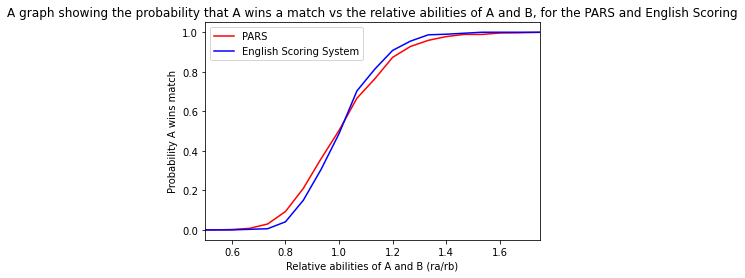

In [262]:
plot_win_probabilities2(1000)

The graph above shows that between the ranges of around 0.65 and 1.5 for ra/rb the PARS seems to have closer to a linear correlation than the English Scoring System, indicating that the probability that A wins and A's relative ability are more closely correlated in the PARS by a small amount. The probability that A wins in the English Scoring System only starts to change significantly from between around 0.7 to 1.4 which is a tighter range than the PARS. 

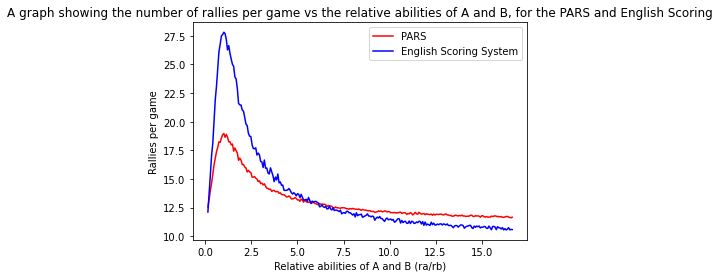

In [263]:
plotMean(500)

The graph above clearly shows that there is, on average, less rallies per game for the PARS when the abilities of ra/rb are between the range 0-6. This is because the games are closer, therefore less consecutive games will be won, therefore there will be more rallies that do not affect the score. When the abilities of ra/rb are over 6, the rallies per game are shorter for the English System as A is virtually guaranteed to win every point, and the games only play until 9 as opposed to 11.

## Conclusions

In conclusion I believe that the PARS is preferable to English Scoring as the number of rallies per game are significantly less where the players are of comparable ability, which in most cases they should be. The player ability and win probability are also slightly more correlated for the PARS than when using English Scoring although this is a less significant difference. In the future I could add a statistical test to see if the difference is significant for figure 1, potentially a Spearman's Rank test could be used.